In [59]:
import numpy as np
import scipy.integrate as integrate
import scipy.optimize as optimize
import matplotlib.pyplot as plt

from scipy.special import gamma

In [63]:
# Physical constants
sigma = 5.670367e-8  # Stefan-Boltzmann constant [W / (m^2 K^4)]

R_over_c_p = 2.0/7.0  # Dry adiabatic slope (assuming diatomic ideal gas, e.g. N2, O2)
p_s = 101325  # Surface pressure [Pa]
D = 1.5  # Two-stream diffusivity factor in the longwave

In [150]:
def T(T_strat, T_sa, p, gamma=1):
    T_da = T_sa * np.power(p/p_s, gamma * R_over_c_p)  # Temperature following a (d)ry (a)diabat
    return np.maximum(T_strat * np.ones(T_da.shape), T_da)

In [161]:
def OLR(T_strat, T_sa, T_g, tau_0, gamma=1, n=1):
    p_values = np.linspace(0, p_s, 1000)
    tau_values = tau_0 * np.power(p_values/p_s, n)
    T_values = T(T_strat=T_strat, T_sa=T_sa, p=p_values, gamma=gamma)
    integrand_values = sigma * np.power(T_values, 4) * np.exp(-D * tau_values)

    # Calculate upward fluxes due to emission from the surface and from the atmosphere
    surface_term = sigma * T_g**4 * np.exp(-D * tau_values[-1])
    atmosphere_term = np.trapz(integrand_values, tau_values)

    return surface_term + atmosphere_term

In [162]:
# Problem 2(a)
# Find surface temperature of planet in equilibrium with an absorbed solar radiation of 250 W/m^2 (i.e. has OLR = 250 W/m^2).
for tau_0 in [0.1, 0.5, 1, 5]:
    T_sa = optimize.newton(func=lambda T_sa: OLR(T_strat=200, T_sa=T_sa, T_g=T_sa, tau_0=tau_0)-250, x0=300)
    print('tau_0 = {:.1f} kg/m^2, T_sa = {:.1f} K'.format(tau_0, T_sa))

tau_0 = 0.1 kg/m^2, T_sa = 263.9 K
tau_0 = 0.5 kg/m^2, T_sa = 289.2 K
tau_0 = 1.0 kg/m^2, T_sa = 320.9 K
tau_0 = 5.0 kg/m^2, T_sa = 493.9 K


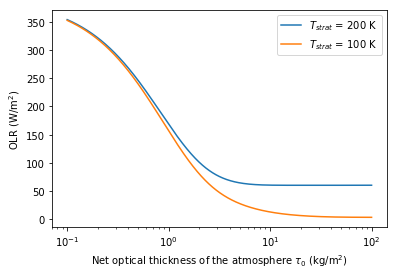

In [164]:
# Problem 2(b)
# Plotting OLR as a function of optical thickness tau_0. We'll choose T_sa = T_g = 288 K (Earth-like).
tau_0_values = np.logspace(-1, 2, 1000)

OLR_values = list(map(lambda tau_0: OLR(T_strat=200, T_sa=288, T_g=288, tau_0=tau_0), tau_0_values))
plt.semilogx(tau_0_values, OLR_values, label=r'$T_{strat}$ = 200 K')

OLR_values = list(map(lambda tau_0: OLR(T_strat=100, T_sa=288, T_g=288, tau_0=tau_0), tau_0_values))
plt.semilogx(tau_0_values, OLR_values, label=r'$T_{strat}$ = 100 K')

plt.xlabel(r'Net optical thickness of the atmosphere $\tau_0$ (kg/m$^2$)')
plt.ylabel(r'OLR (W/m$^2$)')
plt.legend()
plt.show()

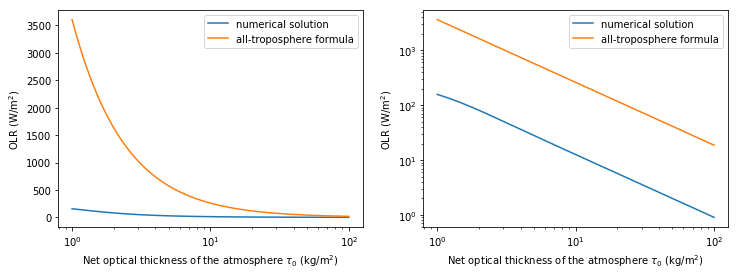

In [166]:
# Problem 2(c)
# Comparing our solution to the all-troposphere formula with T_strat = 0 K.
tau_0_values = np.logspace(0, 2, 1000)

OLR_values = list(map(lambda tau_0: OLR(T_strat=0, T_sa=288, T_g=288, tau_0=tau_0), tau_0_values))
all_troposphere_OLR_values = sigma * T_sa**4 * np.power(tau_0_values, -4*R_over_c_p) * gamma(1 + 4*R_over_c_p)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.semilogx(tau_0_values, OLR_values, label='numerical solution')
plt.semilogx(tau_0_values, all_troposphere_OLR_values, label='all-troposphere formula')
plt.xlabel(r'Net optical thickness of the atmosphere $\tau_0$ (kg/m$^2$)')
plt.ylabel(r'OLR (W/m$^2$)')
plt.legend()

plt.subplot(122)
plt.loglog(tau_0_values, OLR_values, label='numerical solution')
plt.loglog(tau_0_values, all_troposphere_OLR_values, label='all-troposphere formula')
plt.xlabel(r'Net optical thickness of the atmosphere $\tau_0$ (kg/m$^2$)')
plt.ylabel(r'OLR (W/m$^2$)')
plt.legend()

plt.show()

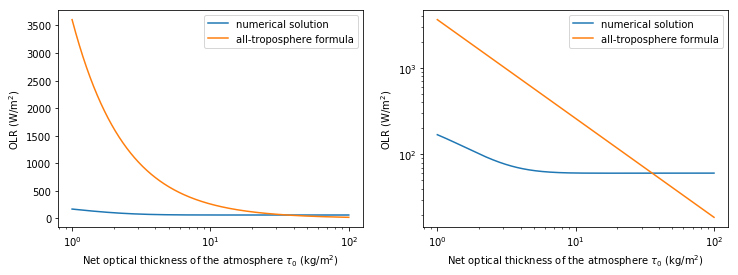

In [167]:
# Problem 2(d)
# Comparing our solution to the all-troposphere formula with T_strat = 200 K.
tau_0_values = np.logspace(0, 2, 1000)

OLR_values = list(map(lambda tau_0: OLR(T_strat=200, T_sa=288, T_g=288, tau_0=tau_0), tau_0_values))
all_troposphere_OLR_values = sigma * T_sa**4 * np.power(tau_0_values, -4*R_over_c_p) * gamma(1 + 4*R_over_c_p)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.semilogx(tau_0_values, OLR_values, label='numerical solution')
plt.semilogx(tau_0_values, all_troposphere_OLR_values, label='all-troposphere formula')
plt.xlabel(r'Net optical thickness of the atmosphere $\tau_0$ (kg/m$^2$)')
plt.ylabel(r'OLR (W/m$^2$)')
plt.legend()

plt.subplot(122)
plt.loglog(tau_0_values, OLR_values, label='numerical solution')
plt.loglog(tau_0_values, all_troposphere_OLR_values, label='all-troposphere formula')
plt.xlabel(r'Net optical thickness of the atmosphere $\tau_0$ (kg/m$^2$)')
plt.ylabel(r'OLR (W/m$^2$)')
plt.legend()

plt.show()

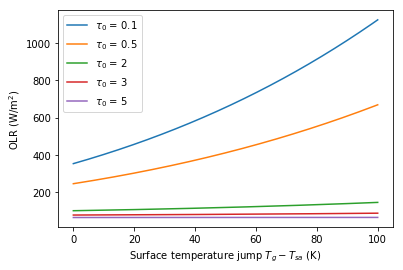

In [160]:
# Problem 2(e)
# Exploring how OLR depends on the surface temperature jump T_g - T_sa for several values of tau_0.
tau_0_values = [0.1, 0.5, 2, 3, 5]
delta_T_values = np.linspace(0, 100, 1000)

for tau_0 in tau_0_values:
    OLR_values = list(map(lambda delta_T: OLR(T_strat=200, T_sa=288, T_g=288+delta_T, tau_0=tau_0), delta_T_values))
    plt.plot(delta_T_values, OLR_values, label=r'$\tau_0$ = {:}'.format(tau_0))

plt.xlabel('Surface temperature jump $T_g - T_{sa}$ (K)')
plt.ylabel(r'OLR (W/m$^2$)')
plt.legend()
plt.show()

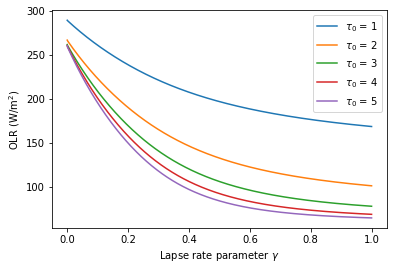

In [168]:
# Problem 2(f)
# Using a modified temperature profile to crudely represent the effect of condensable gases with a lapse rate
# parameter gamma. Taking T_sa = 288 K (Earth-like).
tau_0_values = [1, 2, 3, 4, 5]
gamma_values = np.linspace(0, 1, 1000)

for tau_0 in tau_0_values:
    OLR_values = list(map(lambda gamma: OLR(T_strat=200, T_sa=288, T_g=288, tau_0=tau_0, gamma=gamma), gamma_values))
    plt.plot(gamma_values, OLR_values, label=r'$\tau_0$ = {:}'.format(tau_0))

plt.xlabel(r'Lapse rate parameter $\gamma$')
plt.ylabel(r'OLR (W/m$^2$)')
plt.legend()
plt.show()

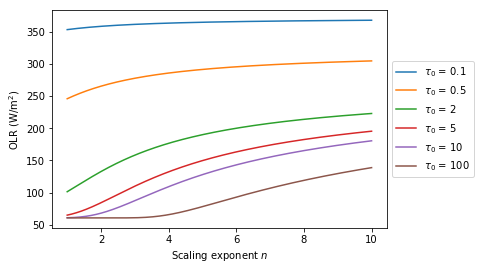

In [181]:
# Problem 2(g)
# Allowing the absorption coefficient to depend on temperature by using a power law to scale tau.
tau_0_values = [0.1, 0.5, 2, 5, 10, 100]
n_values = np.linspace(1, 10, 1000)

for tau_0 in tau_0_values:
    OLR_values = list(map(lambda n: OLR(T_strat=200, T_sa=288, T_g=288, tau_0=tau_0, gamma=1, n=n), n_values))
    plt.plot(n_values, OLR_values, label=r'$\tau_0$ = {:}'.format(tau_0))

plt.xlabel(r'Scaling exponent $n$')
plt.ylabel(r'OLR (W/m$^2$)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()